In [596]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

In [597]:
df=pd.read_csv('Employee_salary.csv')
df

,Emp ID,Name Prefix,First Name,Middle Initial,Last Name,Gender,E Mail,Father's Name,Mother's Name,Mother's Maiden Name,...,SSN,Phone No.,Place Name,County,City,State,Zip,Region,User Name,Password
0,850297,Ms.,Shawna,W,Buck,F,shawna.buck@gmail.com,Rosario Buck,Keisha Buck,Hendricks,...,222-11-7603,702-771-7149,Las Vegas,Clark,Las Vegas,NV,89128,West,swbuck,ja8?k3BTF^]o@<&
1,304721,Mr.,Nathaniel,Z,Burke,M,nathaniel.burke@walmart.com,Derrick Burke,Phoebe Burke,Pugh,...,550-99-9897,231-765-6923,Irons,Lake,Irons,MI,49644,Midwest,nzburke,tPA@4Wh9Ja$+Ln
2,412317,Drs.,Elisabeth,W,Foster,F,elisabeth.foster@gmail.com,Irwin Foster,Janie Foster,Delaney,...,215-91-0004,270-749-4774,Lexington,Fayette,Lexington,KY,40501,South,ewfoster,5D.B4IGNkWJfG<~
3,621375,Mrs.,Briana,C,Lancaster,F,briana.lancaster@yahoo.com,Jeffrey Lancaster,Shelby Lancaster,Weiss,...,534-71-1053,219-623-8216,Munster,Lake,Munster,IN,46321,Midwest,bclancaster,I%?JDM;pW
4,787549,Hon.,Estella,L,Potter,F,estella.potter@gmail.com,Booker Potter,Katelyn Potter,Pate,...,644-29-6396,907-677-8486,Fairbanks,Fairbanks North Star,Fairbanks,AK,99709,West,elpotter,j4jkEXfC&Rh
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,568435,Ms.,Bonnie,K,Baker,F,bonnie.baker@bp.com,Edwardo Baker,Pauline Baker,Robinson,...,064-02-6162,262-696-9171,Mukwonago,Waukesha,Mukwonago,WI,53149,Midwest,bkbaker,a?Co:/r;nu_wTQ
996,597409,Mr.,Luke,S,Turner,M,luke.turner@charter.net,Javier Turner,Nicole Turner,Sykes,...,056-02-8240,231-629-0498,Freeport,Barry,Freeport,MI,49325,Midwest,lsturner,7n5@64VC7|
997,359608,Hon.,Eva,S,Holman,F,eva.holman@hotmail.com,Coy Holman,Haley Holman,Boyle,...,343-11-1935,209-912-6705,Turlock,Stanislaus,Turlock,CA,95381,West,esholman,DG<<<e}*WgD<U
998,803426,Mrs.,Maritza,H,Christian,F,maritza.christian@microsoft.com,Dion Christian,Stephanie Christian,Mooney,...,336-11-5030,203-224-9056,Stamford,Fairfield,Stamford,CT,6910,Northeast,mhchristian,Krs@#TnM


In [598]:
df.columns

Index(['Emp ID', 'Name Prefix', 'First Name', 'Middle Initial', 'Last Name',
       'Gender', 'E Mail', 'Father's Name', 'Mother's Name',
       'Mother's Maiden Name', 'Date of Birth', 'Time of Birth', 'Age in Yrs.',
       'Weight in Kgs.', 'Date of Joining', 'Quarter of Joining',
       'Half of Joining', 'Year of Joining', 'Month of Joining',
       'Month Name of Joining', 'Short Month', 'Day of Joining',
       'DOW of Joining', 'Short DOW', 'Age in Company (Years)', 'Salary',
       'Last % Hike', 'SSN', 'Phone No. ', 'Place Name', 'County', 'City',
       'State', 'Zip', 'Region', 'User Name', 'Password'],
      dtype='object')

In [599]:
df.shape

(1000, 37)

In [600]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 37 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Emp ID                  1000 non-null   int64  
 1   Name Prefix             1000 non-null   object 
 2   First Name              1000 non-null   object 
 3   Middle Initial          1000 non-null   object 
 4   Last Name               1000 non-null   object 
 5   Gender                  1000 non-null   object 
 6   E Mail                  1000 non-null   object 
 7   Father's Name           1000 non-null   object 
 8   Mother's Name           1000 non-null   object 
 9   Mother's Maiden Name    1000 non-null   object 
 10  Date of Birth           1000 non-null   object 
 11  Time of Birth           1000 non-null   object 
 12  Age in Yrs.             1000 non-null   float64
 13  Weight in Kgs.          1000 non-null   int64  
 14  Date of Joining         1000 non-null   o

In [601]:
df.describe()

,Emp ID,Age in Yrs.,Weight in Kgs.,Year of Joining,Month of Joining,Day of Joining,Age in Company (Years),Salary,Zip
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,549097.583000,40.377250,59.409000,2006.992000,6.415000,16.481000,10.093720,120288.528000,48698.499000
std,264810.879315,11.107729,13.900322,8.565588,3.428488,8.831514,8.568863,45178.339916,27396.021481
min,114425.000000,21.040000,40.000000,1980.000000,1.000000,1.000000,0.000000,40040.000000,1002.000000
25%,307757.000000,30.925000,49.000000,2002.000000,4.000000,9.000000,3.152500,82122.000000,25421.750000
50%,543073.000000,40.730000,57.000000,2009.000000,6.000000,17.000000,7.815000,119409.000000,47416.500000
75%,788450.250000,49.852500,68.000000,2014.000000,10.000000,24.000000,15.465000,159109.000000,71101.000000
max,999475.000000,59.980000,90.000000,2017.000000,12.000000,31.000000,37.570000,199943.000000,99791.000000


In [602]:
df.drop(['Name Prefix','First Name','Middle Initial','Last Name','E Mail','User Name','Password'],inplace=True,axis=1)

In [603]:
df.drop(["Father's Name","Mother's Name"],inplace=True,axis=1)

In [604]:
df.drop(["Mother's Maiden Name"],inplace=True,axis=1)

In [605]:
df.drop(['Date of Birth','Time of Birth','Date of Joining','SSN'],inplace=True,axis=1)


In [606]:
df.drop(['Phone No. '],inplace=True,axis=1)

In [607]:
le=LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])
df['Place Name']=le.fit_transform(df['Place Name'])
df['County']=le.fit_transform(df['County'])
df['City']=le.fit_transform(df['City'])
df['State']=le.fit_transform(df['State'])
df['Region']=le.fit_transform(df['Region'])
df['Quarter of Joining']=le.fit_transform(df['Quarter of Joining'])
df['Half of Joining']=le.fit_transform(df['Half of Joining'])
df['Month of Joining']=le.fit_transform(df['Month of Joining'])
df['Month Name of Joining']=le.fit_transform(df['Month Name of Joining'])
df['DOW of Joining']=le.fit_transform(df['DOW of Joining'])
df['Short DOW']=le.fit_transform(df['Short DOW'])
df['Short Month']=le.fit_transform(df['Short Month'])

In [608]:
df['Last % Hike']=list(map(lambda x: x[:-1], df['Last % Hike'].values))

In [609]:
df['Last % Hike'] = [float(x) for x in df['Last % Hike'].values]

In [610]:
df

,Emp ID,Gender,Age in Yrs.,Weight in Kgs.,Quarter of Joining,Half of Joining,Year of Joining,Month of Joining,Month Name of Joining,Short Month,...,Short DOW,Age in Company (Years),Salary,Last % Hike,Place Name,County,City,State,Zip,Region
0,850297,0,45.66,44,3,1,2010,11,2,2,...,2,6.61,119090,17.0,410,106,410,32,89128,3
1,304721,1,23.76,52,1,0,2017,3,0,0,...,5,0.26,117991,14.0,362,276,362,21,49644,0
2,412317,0,22.68,42,0,0,2017,2,7,7,...,1,0.34,161045,28.0,423,184,423,16,40501,2
3,621375,0,41.70,43,0,0,2003,1,3,3,...,5,14.43,142616,16.0,521,276,521,14,46321,0
4,787549,0,22.39,58,3,1,2016,9,10,10,...,5,0.79,135706,11.0,236,177,236,0,99709,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,568435,0,32.01,59,0,0,2008,0,4,4,...,1,9.56,72930,10.0,520,557,520,47,53149,0
996,597409,1,30.48,84,0,0,2010,2,7,7,...,0,7.40,121949,16.0,267,30,267,21,49325,0
997,359608,0,59.88,50,0,0,2001,1,3,3,...,5,16.44,82734,14.0,807,505,807,4,95381,3
998,803426,0,30.21,48,0,0,2012,2,7,7,...,4,5.37,66854,9.0,756,179,756,6,6910,1


In [611]:
df.describe()

,Emp ID,Gender,Age in Yrs.,Weight in Kgs.,Quarter of Joining,Half of Joining,Year of Joining,Month of Joining,Month Name of Joining,Short Month,...,Short DOW,Age in Company (Years),Salary,Last % Hike,Place Name,County,City,State,Zip,Region
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,549097.583000,0.509000,40.377250,59.409000,1.489000,0.481000,2006.992000,5.415000,5.31200,5.31200,...,2.925000,10.093720,120288.528000,15.473000,437.719000,295.853000,437.719000,24.518000,48698.499000,1.410000
std,264810.879315,0.500169,11.107729,13.900322,1.113157,0.499889,8.565588,3.428488,3.50013,3.50013,...,2.008335,8.568863,45178.339916,8.984096,252.677922,161.539123,252.677922,14.228638,27396.021481,1.066319
min,114425.000000,0.000000,21.040000,40.000000,0.000000,0.000000,1980.000000,0.000000,0.00000,0.00000,...,0.000000,0.000000,40040.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1002.000000,0.000000
25%,307757.000000,0.000000,30.925000,49.000000,1.000000,0.000000,2002.000000,3.000000,2.00000,2.00000,...,1.000000,3.152500,82122.000000,8.000000,215.750000,166.750000,215.750000,13.000000,25421.750000,0.000000
50%,543073.000000,1.000000,40.730000,57.000000,1.000000,0.000000,2009.000000,5.000000,5.00000,5.00000,...,3.000000,7.815000,119409.000000,16.000000,436.500000,294.500000,436.500000,24.000000,47416.500000,2.000000
75%,788450.250000,1.000000,49.852500,68.000000,3.000000,1.000000,2014.000000,9.000000,8.00000,8.00000,...,5.000000,15.465000,159109.000000,23.000000,657.250000,431.250000,657.250000,37.000000,71101.000000,2.000000
max,999475.000000,1.000000,59.980000,90.000000,3.000000,1.000000,2017.000000,11.000000,11.00000,11.00000,...,6.000000,37.570000,199943.000000,30.000000,879.000000,581.000000,879.000000,49.000000,99791.000000,3.000000


Emp ID                       AxesSubplot(0.125,0.787927;0.227941x0.0920732)
Gender                    AxesSubplot(0.398529,0.787927;0.227941x0.0920732)
Age in Yrs.               AxesSubplot(0.672059,0.787927;0.227941x0.0920732)
Weight in Kgs.               AxesSubplot(0.125,0.677439;0.227941x0.0920732)
Quarter of Joining        AxesSubplot(0.398529,0.677439;0.227941x0.0920732)
Half of Joining           AxesSubplot(0.672059,0.677439;0.227941x0.0920732)
Year of Joining              AxesSubplot(0.125,0.566951;0.227941x0.0920732)
Month of Joining          AxesSubplot(0.398529,0.566951;0.227941x0.0920732)
Month Name of Joining     AxesSubplot(0.672059,0.566951;0.227941x0.0920732)
Short Month                  AxesSubplot(0.125,0.456463;0.227941x0.0920732)
Day of Joining            AxesSubplot(0.398529,0.456463;0.227941x0.0920732)
DOW of Joining            AxesSubplot(0.672059,0.456463;0.227941x0.0920732)
Short DOW                    AxesSubplot(0.125,0.345976;0.227941x0.0920732)
Age in Compa

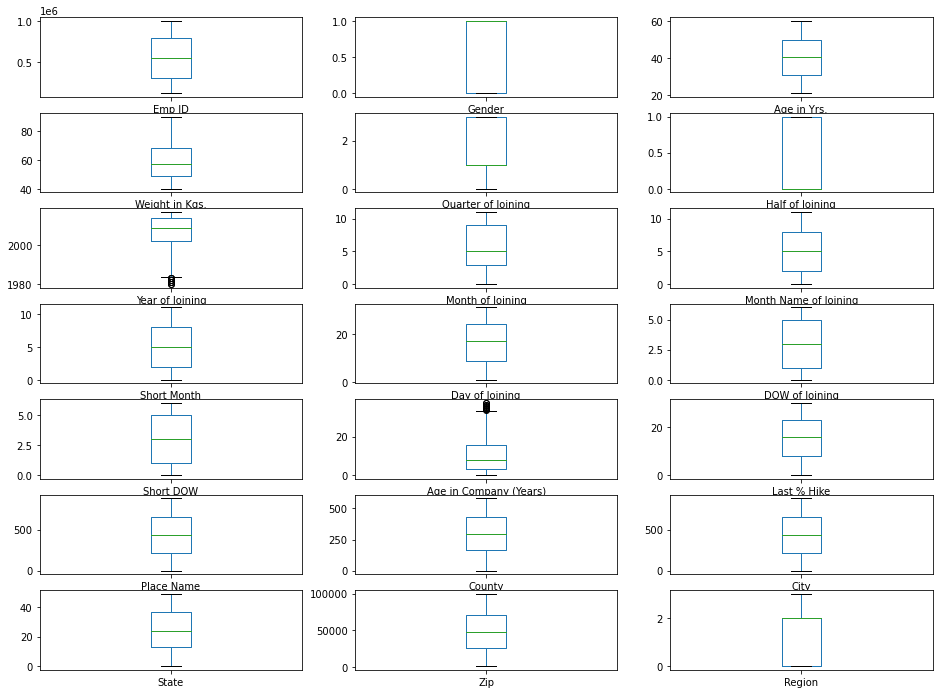

In [635]:
df.plot(kind='box',subplots=True,layout=(7,3),figsize=(16,12))

In [612]:
df.corr()

,Emp ID,Gender,Age in Yrs.,Weight in Kgs.,Quarter of Joining,Half of Joining,Year of Joining,Month of Joining,Month Name of Joining,Short Month,...,Short DOW,Age in Company (Years),Salary,Last % Hike,Place Name,County,City,State,Zip,Region
Emp ID,1.000000,0.064168,-0.028516,0.028175,0.004129,0.011824,0.039009,0.000999,0.009405,0.009405,...,0.002980,-0.039064,-0.027248,-0.010624,0.038287,-0.025864,0.038287,-0.040805,0.020033,-0.011582
Gender,0.064168,1.000000,-0.013794,0.713811,0.016359,-0.011326,0.047214,0.015040,-0.027336,-0.027336,...,0.062954,-0.047735,0.050883,0.030573,0.017259,0.028121,0.017259,0.053496,-0.042090,-0.018187
Age in Yrs.,-0.028516,-0.013794,1.000000,-0.065656,0.020401,0.023395,-0.676875,0.022617,0.009433,0.009433,...,0.018045,0.676408,0.041422,-0.030761,-0.042713,-0.009495,-0.042713,0.013822,-0.017266,-0.018768
Weight in Kgs.,0.028175,0.713811,-0.065656,1.000000,0.002652,-0.009037,0.058794,0.003933,-0.020669,-0.020669,...,0.067686,-0.058846,0.061088,0.015563,-0.011146,0.050563,-0.011146,0.027235,-0.021019,-0.013824
Quarter of Joining,0.004129,0.016359,0.020401,0.002652,1.000000,0.893673,-0.032659,0.971525,0.275013,0.275013,...,-0.059249,0.000146,-0.015299,-0.021450,-0.050673,-0.061764,-0.050673,0.075757,-0.027502,0.005490
Half of Joining,0.011824,-0.011326,0.023395,-0.009037,0.893673,1.000000,-0.035336,0.871060,0.252258,0.252258,...,-0.072711,0.006181,0.005996,-0.051824,-0.048666,-0.063633,-0.048666,0.056834,-0.022812,0.003361
Year of Joining,0.039009,0.047214,-0.676875,0.058794,-0.032659,-0.035336,1.000000,-0.029644,-0.030901,-0.030901,...,-0.013651,-0.999435,-0.053501,0.008960,0.019747,-0.001103,0.019747,-0.015407,0.027221,0.007374
Month of Joining,0.000999,0.015040,0.022617,0.003933,0.971525,0.871060,-0.029644,1.000000,0.315438,0.315438,...,-0.049992,-0.003848,-0.019298,-0.021718,-0.054824,-0.062840,-0.054824,0.076559,-0.028749,0.011185
Month Name of Joining,0.009405,-0.027336,0.009433,-0.020669,0.275013,0.252258,-0.030901,0.315438,1.000000,1.000000,...,-0.010196,0.020292,-0.038814,0.028504,-0.017014,-0.010819,-0.017014,-0.010565,0.010206,0.004313
Short Month,0.009405,-0.027336,0.009433,-0.020669,0.275013,0.252258,-0.030901,0.315438,1.000000,1.000000,...,-0.010196,0.020292,-0.038814,0.028504,-0.017014,-0.010819,-0.017014,-0.010565,0.010206,0.004313


In [ ]:
sns.

In [613]:
y=df['Salary']
y

0      119090
1      117991
2      161045
3      142616
4      135706
        ...  
995     72930
996    121949
997     82734
998     66854
999    105069
Name: Salary, Length: 1000, dtype: int64

In [614]:
df_new=df.drop('Salary',inplace=True,axis=1)

In [615]:
x=df.iloc[ :,0:]
x

,Emp ID,Gender,Age in Yrs.,Weight in Kgs.,Quarter of Joining,Half of Joining,Year of Joining,Month of Joining,Month Name of Joining,Short Month,...,DOW of Joining,Short DOW,Age in Company (Years),Last % Hike,Place Name,County,City,State,Zip,Region
0,850297,0,45.66,44,3,1,2010,11,2,2,...,2,2,6.61,17.0,410,106,410,32,89128,3
1,304721,1,23.76,52,1,0,2017,3,0,0,...,5,5,0.26,14.0,362,276,362,21,49644,0
2,412317,0,22.68,42,0,0,2017,2,7,7,...,1,1,0.34,28.0,423,184,423,16,40501,2
3,621375,0,41.70,43,0,0,2003,1,3,3,...,5,5,14.43,16.0,521,276,521,14,46321,0
4,787549,0,22.39,58,3,1,2016,9,10,10,...,5,5,0.79,11.0,236,177,236,0,99709,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,568435,0,32.01,59,0,0,2008,0,4,4,...,1,1,9.56,10.0,520,557,520,47,53149,0
996,597409,1,30.48,84,0,0,2010,2,7,7,...,0,0,7.40,16.0,267,30,267,21,49325,0
997,359608,0,59.88,50,0,0,2001,1,3,3,...,5,5,16.44,14.0,807,505,807,4,95381,3
998,803426,0,30.21,48,0,0,2012,2,7,7,...,4,4,5.37,9.0,756,179,756,6,6910,1


In [616]:
scaler=StandardScaler()

In [617]:
x=scaler.fit_transform(x)

In [636]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=45)

In [637]:
x_train.shape

(800, 21)

In [638]:
x_test.shape

(200, 21)

In [639]:
y_train.shape

(800,)

In [640]:
y_test.shape

(200,)

In [641]:
lr=LinearRegression

In [642]:
lr.fit(x_train,y_train)

TypeError: fit() missing 1 required positional argument: 'y'